In [25]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import numpy as np
import pandas as pd

In [27]:
from datetime import datetime, timedelta 

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [29]:
engine = create_engine("sqlite:///hawaii2.sqlite")

In [30]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [31]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [32]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
rain_365_days = engine.execute('SELECT date, prcp FROM Measurement WHERE date BETWEEN "2016-08-24" AND "2017-08-23"'
).fetchall()

# Calculate the date 1 year ago from today
engine.execute('SELECT date FROM Measurement ORDER BY date DESC LIMIT 1 OFFSET 365')

# Save the query results as a Pandas DataFrame and set the index to the date column
df_rain = pd.DataFrame(rain_365_days, columns=['date', 'precipitation'])

df_rain.head()

,date,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


<IPython.core.display.Javascript object>


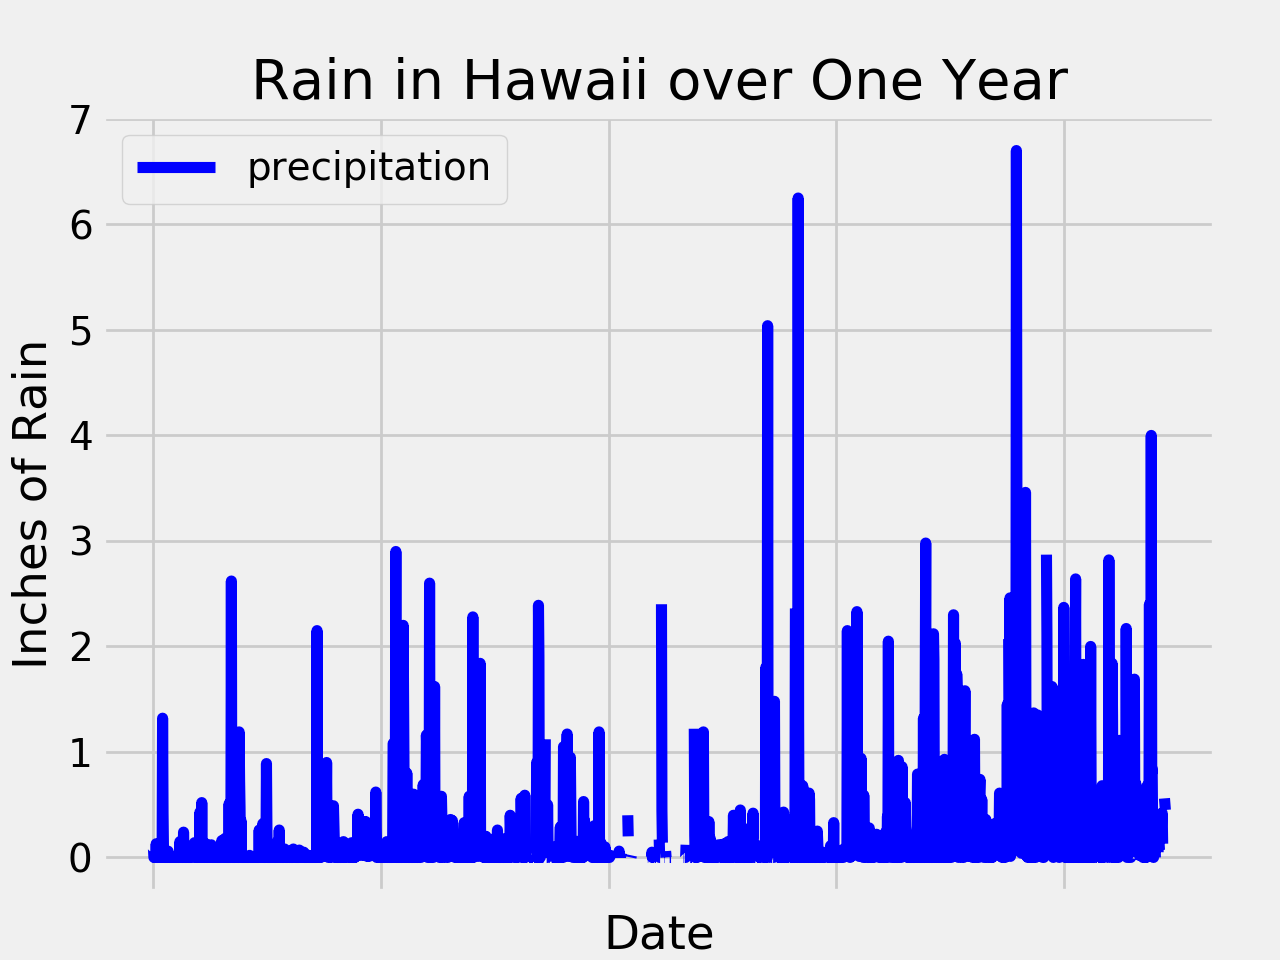

Text(0.5,1,'Rain in Hawaii over One Year')

In [68]:
# Use Pandas Plotting with Matplotlib to plot the data

df_rain.plot(x='date',y='precipitation',color='blue')
plt.xlabel('Date')
plt.ylabel('Inches of Rain')
plt.title('Rain in Hawaii over One Year')

In [59]:
# Calcualte the summary statistics for the precipitation data
df_rain = pd.DataFrame(rain_365_days, columns=['date', 'precipitation'])
df_rain.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [37]:
measurement_all = engine.execute('SELECT * FROM Measurement WHERE date BETWEEN "2016-08-24" AND "2017-08-23"').fetchall()
measurement_df = pd.DataFrame(measurement_all, columns=['id', 'station', 'date', 'precipitation', 'temperature'])

In [38]:
# How many stations are available in this dataset?
count_stations = measurement_df['station'].nunique()
print(count_stations)

7


In [39]:
# What are the most active stations?
station_count_df = measurement_df[['id','station']].groupby(['station']).count()

# List the stations and the counts in descending order.
station_count_df.sort_values('id', ascending=False)

,id
station,
USC00519397,360
USC00519281,351
USC00516128,348
USC00513117,342
USC00519523,336
USC00514830,304
USC00517948,182


In [40]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

min_temp_df = measurement_df[['station','temperature']].groupby(['temperature']).min()
min_temp_df.head(1)

,station
temperature,
58.0,USC00516128


In [41]:
# highest temperature recorded
min_temp_df.tail(1)

,station
temperature,
87.0,USC00517948


In [42]:
# Average temperature by most active station?
measurement_df.loc[measurement_df['station'] == 'USC00519397', 'temperature'].mean()


75.19444444444444

In [43]:
# Choose the station with the highest number of temperature observations.

single_station_df = measurement_df[(measurement_df.station == 'USC00519397')] 
single_station_df.head()

,id,station,date,precipitation,temperature
0,2365,USC00519397,2016-08-24,0.08,79.0
1,2366,USC00519397,2016-08-25,0.08,80.0
2,2367,USC00519397,2016-08-26,0.00,79.0
3,2368,USC00519397,2016-08-27,0.00,77.0
4,2369,USC00519397,2016-08-28,0.01,78.0


<IPython.core.display.Javascript object>


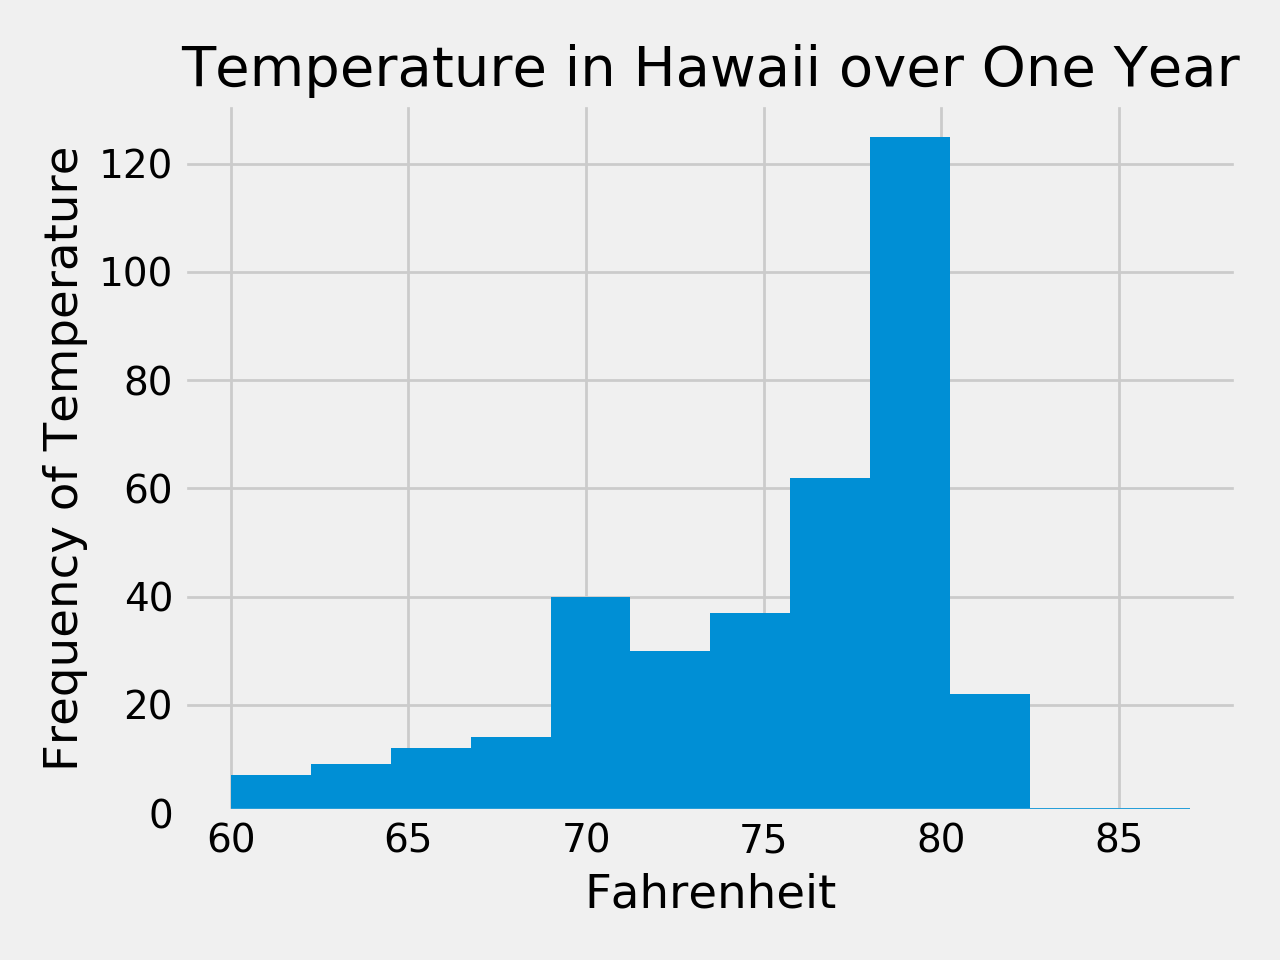

In [44]:
# Plot one years of results for this station as a histogram 

ax=single_station_df.hist(column='temperature', bins=12)
plt.xlabel('Fahrenheit')
plt.ylabel('Frequency of Temperature')
plt.title('Temperature in Hawaii over One Year')
plt.tight_layout()

In [22]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    
    """Temp MIN, Temp AVG, and Temp MAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        Temp MIN, Temp AVG, and Temp MAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [49]:
#create trip temperature data frame
trip_df = pd.DataFrame({'Temperature Type':['Minimum Temp', 'Average Temp', 'Maximum Temp'], 'Temperature':[64, 69.57, 78.0]})
trip_df

,Temperature,Temperature Type
0,64.00,Minimum Temp
1,69.57,Average Temp
2,78.00,Maximum Temp


<IPython.core.display.Javascript object>


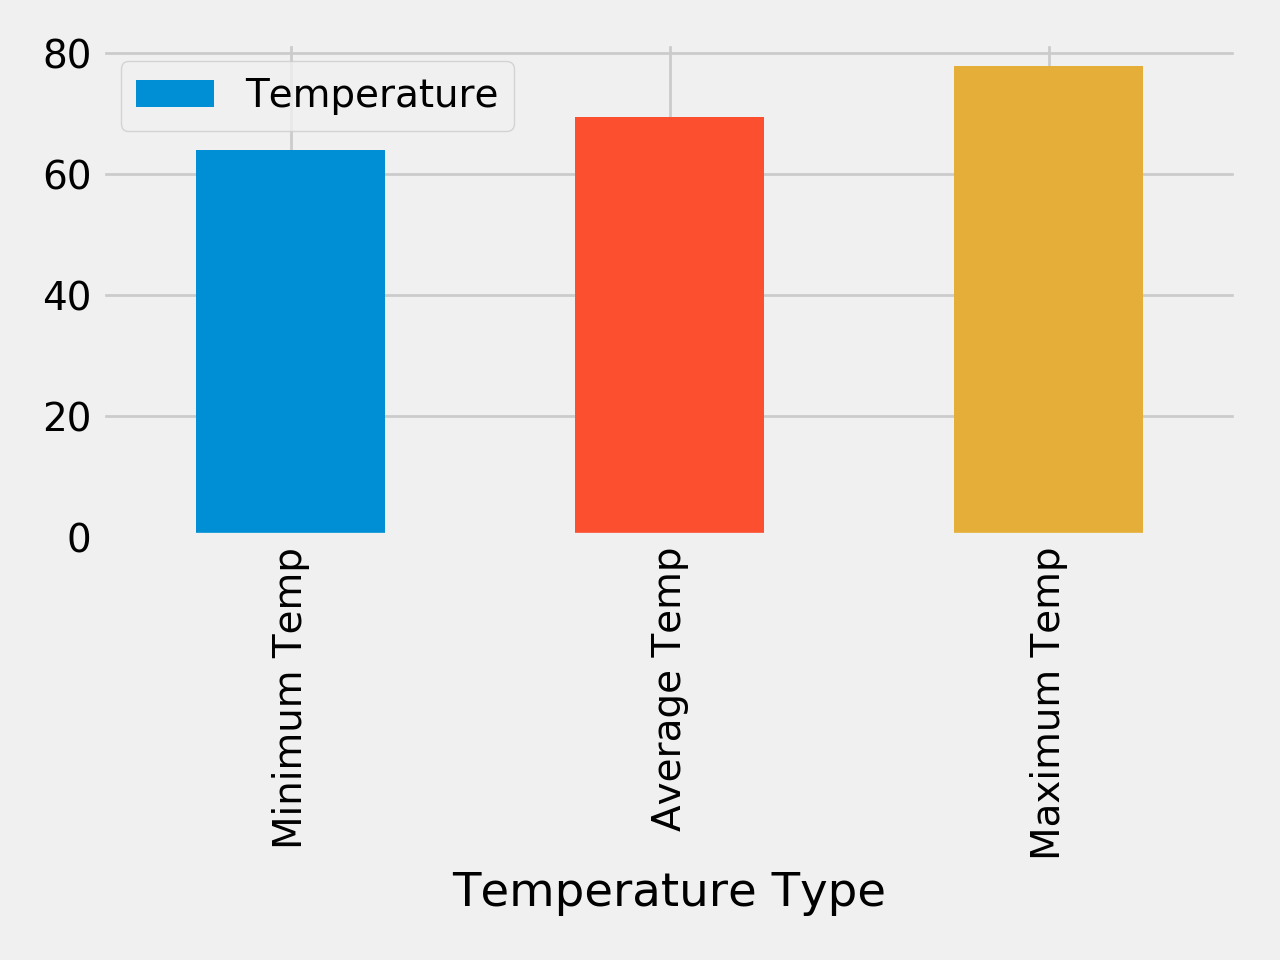

In [56]:
#Plotting trip temperature data frame

trip_df.plot.bar(x='Temperature Type', y='Temperature')
plt.tight_layout()